<h1 style="text-align:center">Build and Evaluate Tree Models</h1>
<h2 style="text-align:center">Applied Question 7</h2>
<p style="text-align:center">Robert Evans</p>
<p style="text-align:center">School of Technology & Engineering, National University</p>
<p style="text-align:center">DDS-8555: Predictive Analysis</p>
<p style="text-align:center">Dr. Mohammad Yavarimanesh</p>
<p style="text-align:center">February 16, 2025</p>

## Load Libraries

In [14]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from sklearn.metrics import mean_squared_error
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
import matplotlib.pyplot as plt

In [15]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import (RandomForestRegressor as RF,
                              GradientBoostingRegressor as GBR)
from ISLP.bart import BART

## Load Data

In [16]:
Boston = load_data("Boston")

## Build a Model

In [17]:
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [18]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, Boston['medv'], test_size=0.3, random_state=0)

In [19]:
bag_boston = RF(max_features=X_train.shape[1], random_state=0)
bag_boston.fit(X_train, y_train)

RandomForestRegressor(max_features=12, random_state=0)

14.634700151315787

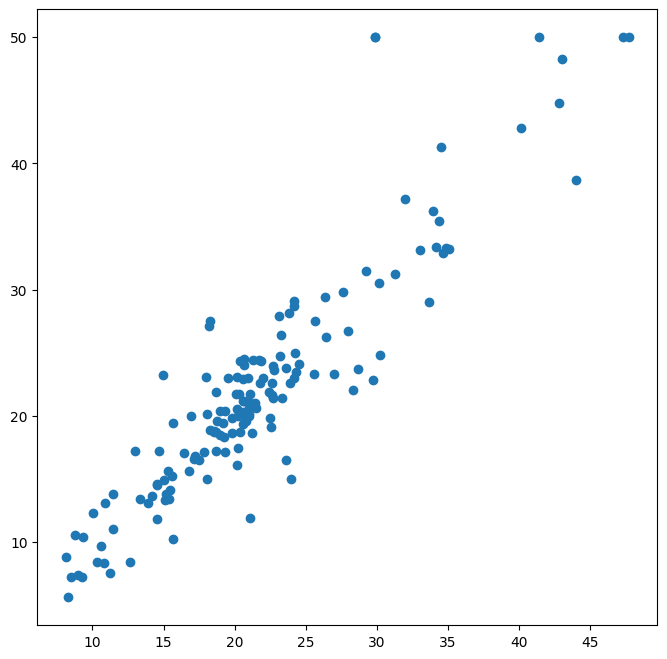

In [20]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag, y_test)
np.mean((y_test - y_hat_bag)**2)

In [21]:
bag_boston = RF(max_features=X_train.shape[1], n_estimators=500, random_state=0).fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

14.605662565263161

In [22]:
bag_boston = RF(max_features=6, random_state=0).fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

20.04276446710527

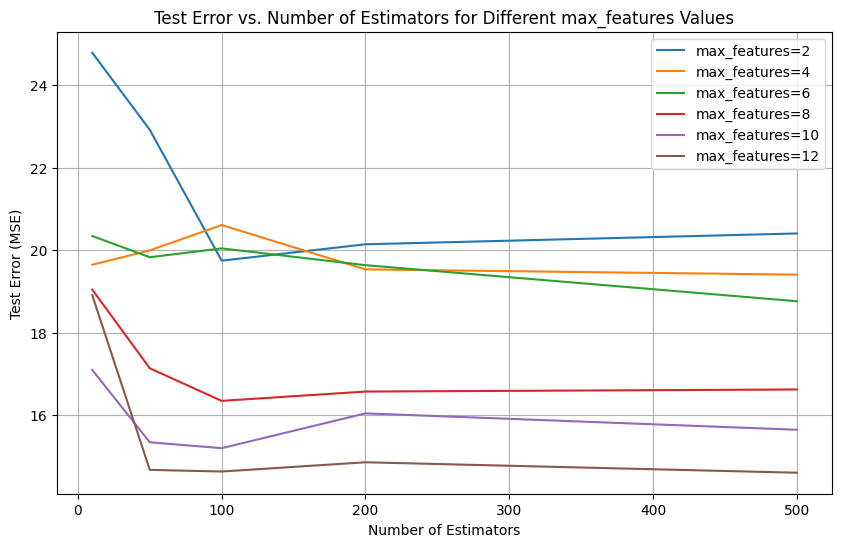

In [23]:
# Define parameter ranges
max_features_range = [2, 4, 6, 8, 10, X_train.shape[1]]
n_estimators_range = [10, 50, 100, 200, 500]

# Store test errors
test_errors = np.zeros((len(max_features_range), len(n_estimators_range)))

# Train models and record test errors
for i, max_features in enumerate(max_features_range):
    for j, n_estimators in enumerate(n_estimators_range):
        rf_model = RF(max_features=max_features, n_estimators=n_estimators, random_state=0)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        test_errors[i, j] = mean_squared_error(y_test, y_pred)

# Plot the results
plt.figure(figsize=(10, 6))
for i, max_features in enumerate(max_features_range):
    plt.plot(n_estimators_range, test_errors[i, :], label=f'max_features={max_features}')

plt.xlabel('Number of Estimators')
plt.ylabel('Test Error (MSE)')
plt.title('Test Error vs. Number of Estimators for Different max_features Values')
plt.legend()
plt.grid()
plt.show()